<a href="https://colab.research.google.com/github/hectorcamachoz/Proyecto_1_InteligenciaArtificial/blob/main/P1_594557.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto 1.

El objetivo de este proyecto es realizar un modelo que prediga el numero bicicletas rentadas en un dia, utilizando los siguientes datos:
- dteday - Dia
- season - Temporada
- yr - Año
- mnth - Mes
- holiday - Festividad
- weekday - Dia entre semana
- workingday - Dia laboral
- weathersit - Clima
- temp - Temperatura (°C)
- atemp - Sensacion termica
- hum - Humeadad
- windspeed - Velocidad del aire
- casual - Usuarios Casuales
- registered - Usuarios Registrados

Los detalles de cada variable se encuentran en el archivo 'Descripcion_vars.txt'

Esta base de datos cuenta con 731 observaciones y cuenta con 14 variables, sin contar la variable instant, que es el index, y la variable de salida Cnt que es el numero de bicicletas rentadas.

**1.** Primero se importara la base de datos, para conocer sus caracteristicas, para despues comenzar a hacer una seleccion de variables.

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = pd.read_csv('day.csv')

print('Una muestra de las primeras 5 observaciones:\n',df.head())

print('\nEl tamaño de nuestra base de datos: ',df.shape)

print('\nTipo de variables en la base de datos:\n',df.dtypes)



Una muestra de las primeras 5 observaciones:
    instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  


Con esta informacion no se que tipo de regresion es la mejor opcion, para eso necesito establecer las variables, en variables cuantitativas.

Para comenzar, primero se deben de cambiar algunas variables categoricas, la mas obvia es la variable dteday, que es la fecha, despues tenemos variables que son valores enteros, pero pueden llegar a tener valores repetitivos como la temporada, el año, el mes, si es entre semana, el clima, y el dia de la semena.
Para comenzar eliminare la variable de la fecha, considero que no podria sacar informacion nueva que sea relevante, ya que las otras variables especifican si es fin de semana, o si hay alguna fetividad. Ademas de esa variable, tambien eliminare la variable instant. Para la variable de mes, lo que hare sera una transformacion a



In [41]:
df = df.drop('instant', axis=1)
df = df.drop('dteday', axis= 1)
df['mnth_sin'] = np.sin(2 * np.pi * df['mnth'] / 12)
df['mnth_cos'] = np.cos(2 * np.pi * df['mnth'] / 12)

Para continuar, utilizare la funcion get_dummies, para la temporada, el clima. Considero que la variable de weekday y workingday, nos dicen la misma informacion interpretada diferente, por lo tanto, eliminare la variable weekday.

In [42]:
df = df.drop('weekday', axis=1)
df = pd.get_dummies(df, columns=['season', 'weathersit'],drop_first=False, dtype = int)




df.head()

     yr  mnth  holiday  workingday      temp     atemp       hum  windspeed  \
0     0     1        0           0  0.344167  0.363625  0.805833   0.160446   
1     0     1        0           0  0.363478  0.353739  0.696087   0.248539   
2     0     1        0           1  0.196364  0.189405  0.437273   0.248309   
3     0     1        0           1  0.200000  0.212122  0.590435   0.160296   
4     0     1        0           1  0.226957  0.229270  0.436957   0.186900   
..   ..   ...      ...         ...       ...       ...       ...        ...   
726   1    12        0           1  0.254167  0.226642  0.652917   0.350133   
727   1    12        0           1  0.253333  0.255046  0.590000   0.155471   
728   1    12        0           0  0.253333  0.242400  0.752917   0.124383   
729   1    12        0           0  0.255833  0.231700  0.483333   0.350754   
730   1    12        0           1  0.215833  0.223487  0.577500   0.154846   

     casual  registered   cnt  season_1  season_2  

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3,mnth_sin,mnth_cos
0,0,1,0,0,0.344167,0.363625,0.805833,0.160446,331,654,985,1,0,0,0,0,1,0,0.5,0.866025
1,0,1,0,0,0.363478,0.353739,0.696087,0.248539,131,670,801,1,0,0,0,0,1,0,0.5,0.866025
2,0,1,0,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,1,0,0,0,1,0,0,0.5,0.866025
3,0,1,0,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,1,0,0,0,1,0,0,0.5,0.866025
4,0,1,0,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,1,0,0,0,1,0,0,0.5,0.866025


Ahora, hare una tabla de correlacion para verificar si, tengo algunas variables esten correlacionadas.

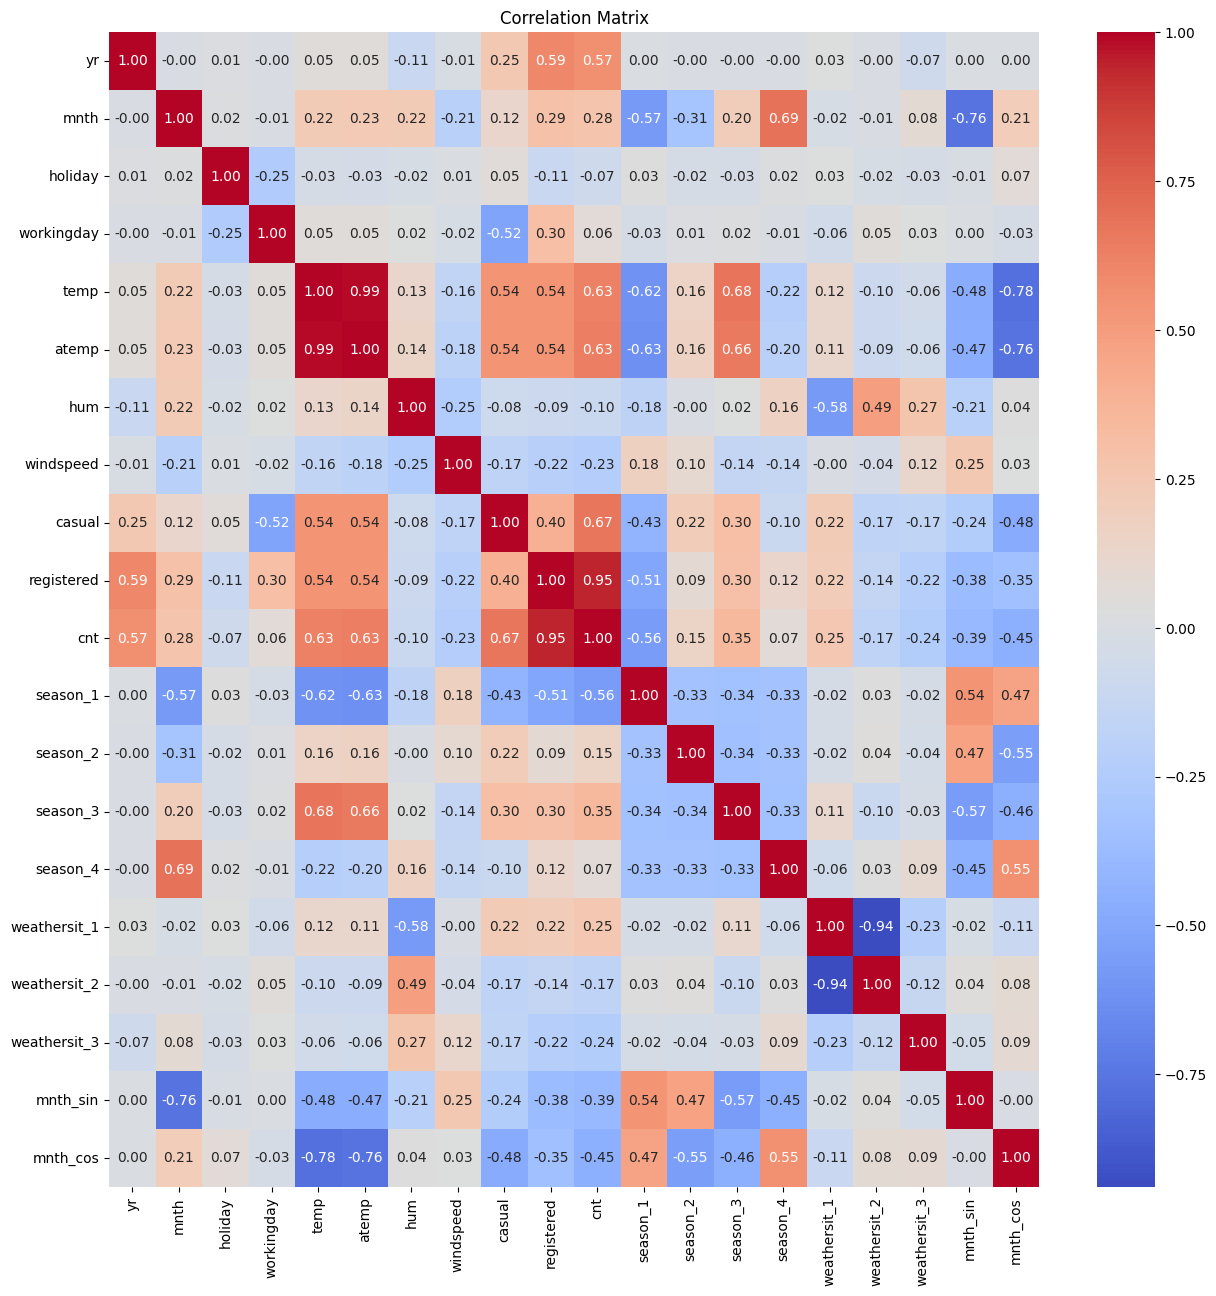

In [43]:
corr_matx = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_matx, annot=True, cmap = 'coolwarm', fmt = ".2f")
plt.title('Correlation Matrix')
plt.show()

Al observar la tabla de correlacion, podemos concluir principalmente dos cosas. La primera, la variable registered es la variable con mayor correlacion con nuestra variable de salida, que es cnt, por lo tanto, es nuestra variable mas importante. Lo segundo es que se puede observar una correlacion muy grande entre la temperatura y la sensacion termica, esto tiene sentido ya que las mediciones suelen tener una diferencia minima, ambas variables tienen la misma correlacion con la variable de salida, por lo tanto, eliminare la variable atemp.

In [44]:
df = df.drop('atemp', axis = 1)

Para terminar con la limpieza, observare la base de datos para saber si no hay ningun hueco, y buscare valores atipicos.

In [45]:
print('Cantidad de Huecos en la base de datos:\n',df.isnull().sum())

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR
outliers = df[(df < lower_bound) | (df > upper_bound)]
print("Valores atipicos:")
outliers

Cantidad de Huecos en la base de datos:
 yr              0
mnth            0
holiday         0
workingday      0
temp            0
hum             0
windspeed       0
casual          0
registered      0
cnt             0
season_1        0
season_2        0
season_3        0
season_4        0
weathersit_1    0
weathersit_2    0
weathersit_3    0
mnth_sin        0
mnth_cos        0
dtype: int64
Valores atipicos:


,yr,mnth,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3,mnth_sin,mnth_cos
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
